# question 1:

In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("Housing.csv", index_col=0)

# question 2:

In [3]:
data.head()

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
1  42000.0     5850         3        1        2      yes      no      yes   
2  38500.0     4000         2        1        1      yes      no       no   
3  49500.0     3060         3        1        1      yes      no       no   
4  60500.0     6650         3        1        2      yes     yes       no   
5  61000.0     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
1    no    no         1       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  
5    no    no         0       no

In [4]:
#number of features
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [5]:
#number of instances
data.shape

(546, 12)

In [6]:
#number of datatypes
data.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [7]:
#check for null
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

# question 3:

In [8]:
#selecting the first 70%
n =0.7
train = int(len(data)*(n))
train = data[['price','lotsize']].loc[:train]


In [9]:
train.shape

(382, 2)

In [10]:
x=data['lotsize']
y=data['price']
train

price  lotsize
1     42000.0     5850
2     38500.0     4000
3     49500.0     3060
4     60500.0     6650
5     61000.0     6360
6     66000.0     4160
7     66000.0     3880
8     69000.0     4160
9     83800.0     4800
10    88500.0     5500
11    90000.0     7200
12    30500.0     3000
13    27000.0     1700
14    36000.0     2880
15    37000.0     3600
16    37900.0     3185
17    40500.0     3300
18    40750.0     5200
19    45000.0     3450
20    45000.0     3986
21    48500.0     4785
22    65900.0     4510
23    37900.0     4000
24    38000.0     3934
25    42000.0     4960
26    42300.0     3000
27    43500.0     3800
28    44000.0     4960
29    44500.0     3000
30    44900.0     4500
..        ...      ...
353   78500.0     7980
354   86000.0     6800
355   86900.0     4300
356   75000.0    10269
357   78000.0     6100
358   95000.0     6420
359   97000.0    12090
360  107000.0     6600
361  130000.0     6600
362  145000.0     8580
363  175000.0     9960
364   72000.0    10700
365   84900.0    15600
366   99000.0    13200
367  114000.0     9000
368  120000.0     7950
369  145000.0    16200
370   79000.0     6100
371   82000.0     6360
372   85000.0     6420
373  100500.0     6360
374  122000.0     6540
375  126500.0     6420
376  133000.0     6550
377  140000.0     5750
378  190000.0     7420
379   84000.0     7160
380   97000.0     4000
381  103500.0     9000
382  112500.0     6550

[382 rows x 2 columns]

In [11]:
# drawing the scatter plot
data.plot.scatter(x='lotsize',y='price')

In [12]:
#Create the regression model
"""
X = [1,2,3,4,5]
Y = [1,1,2,2,4]
start_range = 0
end_range = 6
number_of_values = 5
"""

X = data['lotsize']
Y = data['price']
start_range = 1
end_range = 383
number_of_values = 382

def regression(axis_x, axis_y):
    # values of x 
    sum_of_x = 0 
    mean_of_x = 0
    x_subtract_x_mean = 0
    sum_of_new_x = 0
    
    # values of y
    sum_of_y = 0
    mean_of_y= 0
    y_subtract_y_mean = 0
    sum_of_new_y = 0
    
    # ey0 = b0+b1x
    y0 = 0
    b0 = 0
    b1x = 0
    
    # common values
    x_X_multiply_y_Y = 0 # (x-x)(y-y)
    x_subtract_x_mean_squared = 0 # (x-x)^2
    sum_x_squared = 0 # sum(x-x)^2
    sum_x_mult_y = 0 # sum (x-x)(y-y)
    
    # mean of x
    for variable in axis_x:
        sum_of_x += variable
    mean_of_x = sum_of_x / number_of_values
    #print("mean x", mean_of_x)
    
    # mean of y
    for variable in axis_y:
        sum_of_y += variable 
    mean_of_y = sum_of_y / number_of_values
    #print("mean y", mean_of_y)
    
    # x-x(mean), y-y(mean)
    for variable in range(start_range,end_range): 
        # x-x(mean)
        x_subtract_x_mean = axis_x[variable] - mean_of_x
        
        # y-y(mean)
        y_subtract_y_mean = axis_y[variable] - mean_of_y
        
        # x-x(mean) x y-y(mean)
        x_X_multiply_y_Y = x_subtract_x_mean * y_subtract_y_mean
        
        # x-x(mean)sq
        x_subtract_x_mean_squared = (axis_x[variable] - mean_of_x)*(axis_x[variable] - mean_of_x)
        
        # do summations
        # sum(x-x)^2
        sum_x_squared += x_subtract_x_mean_squared
        
        # sum (x-x)(y-y)
        sum_x_mult_y += x_X_multiply_y_Y
    
    #mean_of_xa = sum_of_new_x / number_of_values
    b1x = sum_x_mult_y / sum_x_squared 
    b0 = mean_of_y - (b1x*mean_of_x)
    
    return print("y0 = ", b0, " + ", b1x, 'x')

regression(train['lotsize'], train['price'])

y0 =  27930.188218578696  +  7.551670065490921 x


# question 4:

In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
# create a dataset with 2 columns
dataset = data
dataset.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [15]:
# create x and y the independent and dependent variable 
x = pd.DataFrame(dataset['lotsize'])
y = pd.DataFrame(dataset['price'])

In [16]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [17]:
x_train.shape

(382, 1)

In [18]:
y_train.shape

(382, 1)

In [19]:
# create a linear regression model 
linearRegressor = LinearRegression()

In [20]:
#fitting the model into our data(learning from the data)
linearRegressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

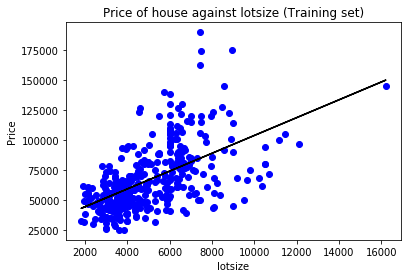

In [21]:
#testing if our model
plt.scatter(x_train, y_train, color='blue') # actual values from the dataset
plt.plot(x_train, linearRegressor.predict(x_train), color='black')
plt.title('Price of house against lotsize (Training set)')
plt.xlabel('lotsize')
plt.ylabel('Price')
plt.show()

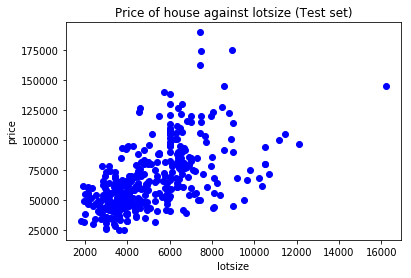

In [22]:
#Drawing the plot
plt.scatter(x_train, y_train, color='blue')
plt.title('Price of house against lotsize (Test set)')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.show()


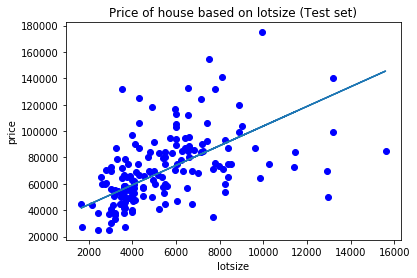

In [23]:
# Plot the line of best fit using the learned regression model.
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test,linearRegressor.predict(x_test))
plt.title('Price of house based on lotsize (Test set)')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.show()


In [24]:
# calculate Sum of Squared Errors

dataset_mean = np.mean(y_train)
sse = 0
new_data = y_train[0]
for y in new_data:
    predicty = linearRegressor.predict(y)
    sse += np.square(y-predicty)
sse

KeyError: 0

In [25]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, linearRegressor2.predict(x_train))
mse
y_train

NameError: name 'linearRegressor2' is not defined

In [26]:
print(linearRegressor.coef_)

[[7.44691016]]


In [27]:
# y = mx + c
# Determine the coefficient of determination of the model
print(linearRegressor.intercept_)#c
print(linearRegressor.coef_) #mx

[29363.80493029]
[[7.44691016]]


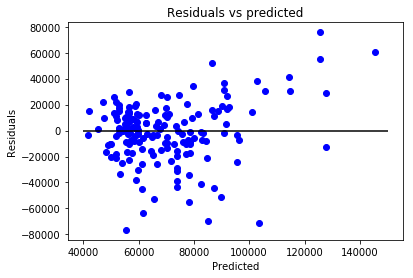

In [28]:
plt.scatter(linearRegressor.predict(x_test), linearRegressor.predict(x_test)-y_test, color='blue')
plt.hlines(y = 0, xmin = 40000, xmax = 150000)
plt.title('Residuals vs predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()


# question 5:

In [29]:
from sklearn.datasets import load_boston

In [30]:
#call the method
boston = load_boston()

In [31]:
#type of variable
type(boston)

sklearn.utils.Bunch

In [32]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [33]:
#checking the keys
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [34]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [35]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [36]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
# Create a dataframe from the data in boston
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [38]:
#check for null
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [39]:
# create x and y the independent and dependent variable
x = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [41]:
#creating a mulltiple linear regression model
linearRegressor2 = LinearRegression()
linearRegressor2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#what is the model learned
b0 = linearRegressor2.intercept_
b1x = linearRegressor2.coef_.tolist()
print('y0 = ',b0,' + ', 'b', b1x)

y0 =  [37.93710774]  +  b [[-0.12131040096834803, 0.044466425428891974, 0.011341694511899422, 2.5112464244914254, -16.23125290285638, 3.859068009825197, -0.009985165654559876, -1.5002695632650123, 0.24214346605810652, -0.011071612402086083, -1.017752638418597, 0.006814465447643939, -0.48673806564491234]]


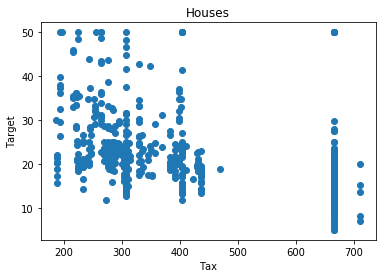

In [43]:
plt.scatter(boston_data.TAX, boston.target)
plt.title('Houses')
plt.xlabel('Tax')
plt.ylabel('Target')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, linearRegressor2.predict(x_train))
mse
y_train

0
141  14.4
272  24.4
135  18.1
298  22.5
122  20.5
22   15.2
68   17.4
20   13.6
437   8.7
14   18.2
281  35.4
231  31.7
64   33.0
327  22.2
322  20.4
81   23.9
360  25.0
394  12.7
194  29.1
477  12.0
461  17.7
160  27.0
484  20.6
379  10.2
499  17.5
496  19.7
473  29.8
51   20.5
458  14.9
427  10.9
..    ...
265  22.8
72   22.8
333  22.2
25   13.9
165  25.0
337  18.5
489   7.0
174  22.6
492  20.1
39   30.8
193  31.1
314  23.8
396  12.5
88   23.6
472  23.2
70   24.2
87   22.2
292  27.9
242  22.2
277  33.1
211  19.3
9    18.9
359  22.6
195  50.0
251  24.8
323  18.5
192  36.4
117  19.2
47   16.6
172  23.1

[354 rows x 1 columns]

In [45]:
# calculate Sum of Squared Errors
dataset_mean = np.mean(y_train)
sse = 0
new_data = y_train[0]
for y in new_data:
    predicty = linearRegressor.predict(y)
    sse += np.square(y-predicty)
sse

ValueError: Expected 2D array, got scalar array instead:
array=14.4.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
#coeffiecient of determination
b1x = linearRegressor2.coef_
b1x

array([[-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,
         2.51124642e+00, -1.62312529e+01,  3.85906801e+00,
        -9.98516565e-03, -1.50026956e+00,  2.42143466e-01,
        -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
        -4.86738066e-01]])